# TP 2 - 30/09/22

In [1]:
from qiskit import *
from qiskit.quantum_info import Statevector, DensityMatrix, random_statevector
from qiskit.tools.visualization import plot_histogram, plot_state_qsphere, plot_bloch_vector, plot_state_city, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit.result import marginal_counts
import numpy as np

## Exercice 1

> En binaire, l'information est représentée sous forme de bit à valeur dans {1, 0}. <br>
> Il est possible d'utiliser plusieurs bits pour coder des nombres à valeurs supérieures à 2. En utilisant n bits, il est possible de coder jusqu'à 2^n valeurs différentes.

> L'opérateur NOT est un opérateur logique à 1 bit permettant d'inverser la valeur d'un bit :
>> NOT(0) -> 1<br>
>> NOT(1) -> 0

> L'opérateur AND est un opérateur logique à 2 bits :
>> AND(0, 0) -> 0<br>
>> AND(0, 1) -> 0<br>
>> AND(1, 0) -> 0<br>
>> AND(1, 1) -> 1

> L'opérateur OR est un opérateur logique à 2 bits :
>> OR(0, 0) -> 0<br>
>> OR(0, 1) -> 1<br>
>> OR(1, 0) -> 1<br>
>> OR(1, 1) -> 1

> L'opérateur XOR est un opérateur logique à 2 bits :
>> XOR(0, 0) -> 0<br>
>> XOR(0, 1) -> 1<br>
>> XOR(1, 0) -> 1<br>
>> XOR(1, 1) -> 0

> Un qubit est la version quantique d'un bit, permettant de représenter de l'information.<br>
> Lors de la mesure, il est à valeur dans {|0>, |1>}<br>
> Mais avant la mesure, sa valeur est incertaine, on dit qu'il est dans un état superposé. 
>> Si |Ψ> = α.|0> + β.|1>, alors α² est la chance que le qubit soit dans l'état |0>, et β² représente sa chance d'être dans l'état |1>. 

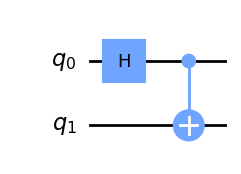

In [10]:
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.draw('mpl')

# Exercice 2

> Hadamard H :
>> C'est l'opérateur de superposition quantique. Il s'applique à un qubit, et permet de placer celui-ci dans un état de superposition quantique : |Ψ> = 1/√2.|0> + 1/√2.|1>.<br>
>> Sa matrice de passage : 
>> $$\frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$$
>> $$\frac{1}{\sqrt{2}}|0> + \frac{1}{\sqrt{2}}|1>$$

> NOT X :
>> C'est l'opérateur équivalent au NOT binaire : il inverse la valeur du qubit.<br>
>> Sa matrice de passage :
>>$$\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$
<br>
>>$$|0> \rightarrow |1>$$
>>$$|0> \rightarrow |1>$$

> CNOT :
>> C'est l'équivalent de l'opérateur NOT, mais avec un qubit de contrôle : il va appliquer le NOT au qubit, seulement dans le cas où le qubit de contrôle est à |1>.<br>
>> Sa matrice de passage : 
>>$$\begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}$$
<br>
>>$$|00> \rightarrow |00>$$
>>$$|01> \rightarrow |01>$$
>>$$|10> \rightarrow |11>$$
>>$$|11> \rightarrow |10>$$

> SWAP :
>> L'opérateur SWAP est un opérateur à deux qubits, dont il échange les états.<br>
>> Il est équivalent à 3 portes CNOT à la suite
>> Sa matrice de passage :
>>$$\begin{pmatrix} 
1 & 0 & 0 & 0 \\ 
0 & 0 & 1 & 0 \\ 
0 & 1 & 0 & 0 \\ 
0 & 0 & 0 & 1 \end{pmatrix}$$
<br>
>>$$|00> \rightarrow |00>$$
>>$$|01> \rightarrow |10>$$
>>$$|10> \rightarrow |01>$$
>>$$|11> \rightarrow |11>$$

> CSWAP :
>> L'opérateur CSWAP est l'équivalent du SWAP, mais avec un bit de contrôle : il va appliquer SWAP aux qubits, uniquement dans le cas où le qubit de contrôle est à |1>.<br>
>> Sa matrice de passage :
>>$$\begin{pmatrix} 
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1  \end{pmatrix}$$
<br>
>>$$|000> \rightarrow |000>$$
>>$$|001> \rightarrow |001>$$
>>$$|010> \rightarrow |010>$$
>>$$|011> \rightarrow |011>$$
>>$$|100> \rightarrow |100>$$
>>$$|101> \rightarrow |110>$$
>>$$|110> \rightarrow |101>$$
>>$$|111> \rightarrow |111>$$

> TOF (CCNOT) :
>> L'opérateur TOP est l'équivalent du NOT, mais avec deux bits de contrôle : il va appliquer NOT au qubit, uniquement dans le cas où les deux qubits de contrôle sont à |1>.<br>
>> Sa matrice de passage :
>>$$\begin{pmatrix} 
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\ 
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\ 
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0  \end{pmatrix}$$
<br>
>>$$|000> \rightarrow |000>$$
>>$$|001> \rightarrow |001>$$
>>$$|010> \rightarrow |010>$$
>>$$|011> \rightarrow |011>$$
>>$$|100> \rightarrow |100>$$
>>$$|101> \rightarrow |101>$$
>>$$|110> \rightarrow |111>$$
>>$$|111> \rightarrow |110>$$

In [11]:
def Hadamard(q1):
    circ = QuantumCircuit(1)
    if q1:
        circ.x(0)
    circ.h(0)
    return circ

def CNot(q1, q2):
    circ = QuantumCircuit(2)
    if q1:
        circ.x(0)
    if q2:
        circ.x(1)
    circ.cx(0, 1)
    return circ

def Swap(q1, q2):
    circ = QuantumCircuit(2)
    if q1:
        circ.x(0)
    if q2:
        circ.x(1)
    circ.swap(0, 1)
    return circ

def CSwap(q1, q2, q3):
    circ = QuantumCircuit(3)
    if q1:
        circ.x(0)
    if q2:
        circ.x(1)
    if q3:
        circ.x(2)
    circ.cswap(0, 1, 2)
    return circ

def TOF(q1, q2, q3):
    circ = QuantumCircuit(3)
    if q1:
        circ.x(0)
    if q2:
        circ.x(1)
    if q3:
        circ.x(2)
    circ.toffoli(0, 1, 2)
    return circ

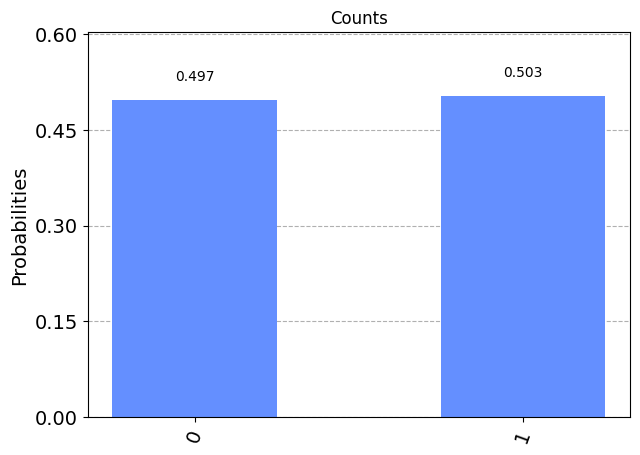

In [12]:
circ = Hadamard(0)
circ.measure_all()
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Counts')

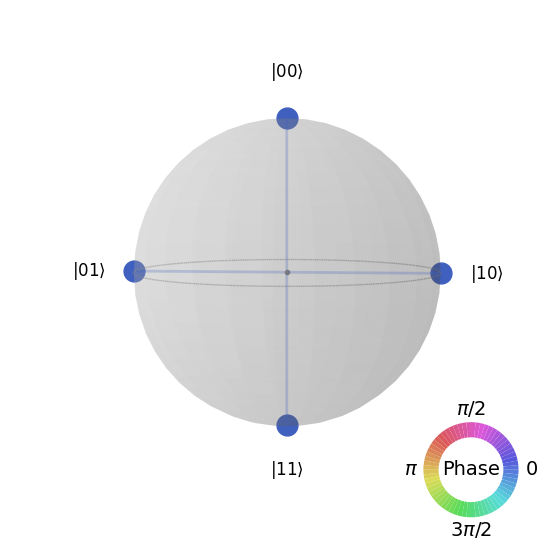

In [2]:
# Représentation d'état dans une shpère de Bloch
# La taille des points est proportionnelle à leur probabilité
circ = QuantumCircuit(2)
circ.h(0)
circ.h(1)
state = Statevector(circ)
plot_state_qsphere(state)

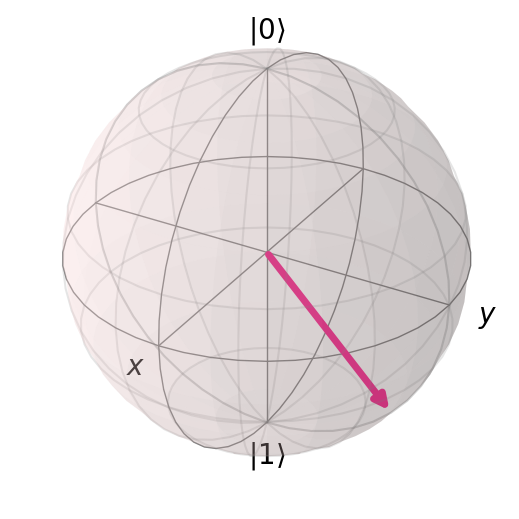

In [3]:
# Vecteur de Bloch associé
plot_bloch_vector([1, 3*np.pi/4, np.pi/2], coord_type='spherical')

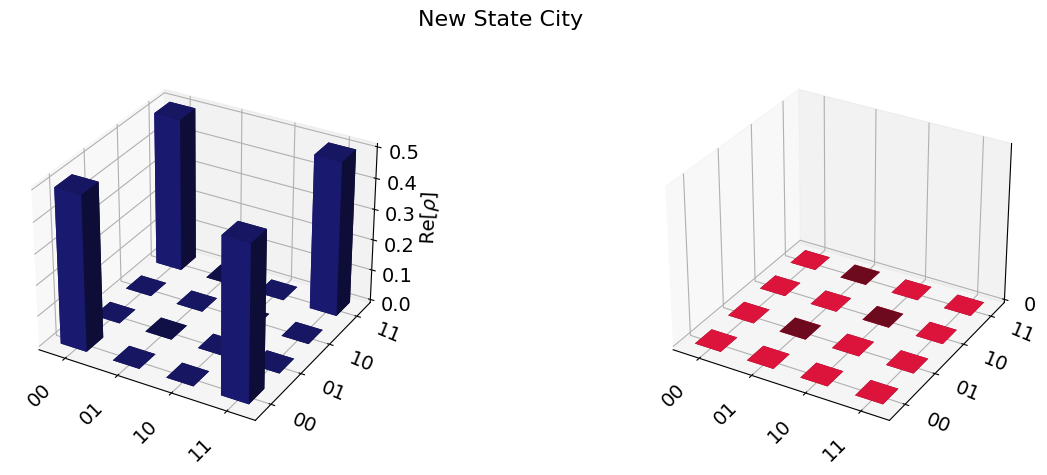

In [6]:
# State city
circ = QuantumCircuit(2)
circ.h(1)
circ.cx(1, 0)

state = DensityMatrix(circ)
plot_state_city(state, color=['midnightblue', 'crimson'], title='New State City')

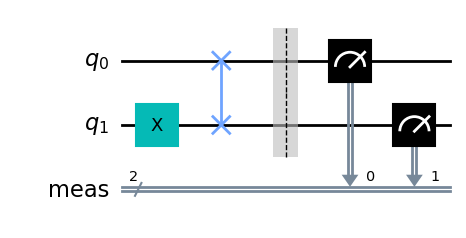

In [13]:
circ1 = Swap(0, 1)
circ1.measure_all()
circ1.draw('mpl')

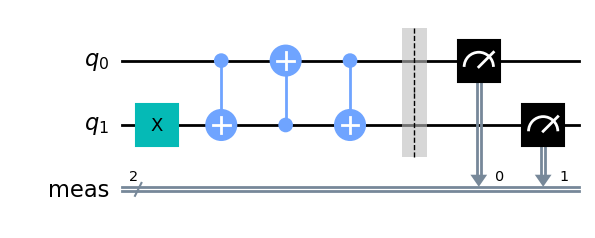

In [14]:
circ2 = CNot(0, 1)
circ2.cx(1, 0)
circ2.cx(0, 1)
circ2.measure_all()
circ2.draw('mpl')

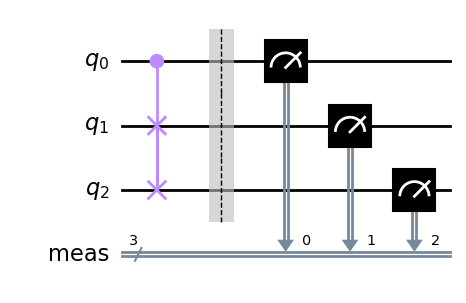

In [15]:
circ3 = CSwap(0, 0, 0)
circ3.measure_all()
circ3.draw('mpl')

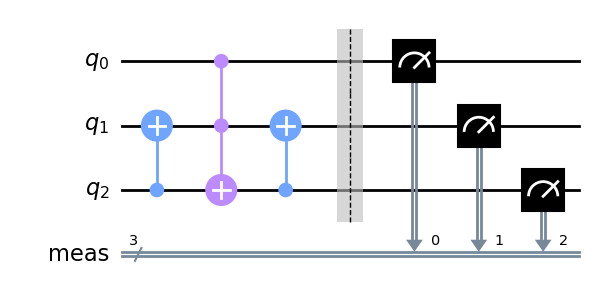

In [16]:
circ4 = QuantumCircuit(3)
circ4.cx(2, 1)
circ4.toffoli(0, 1, 2)
circ4.cx(2, 1)
circ4.measure_all()
circ4.draw('mpl')

# TP3

In [31]:
from qiskit.tools.monitor import job_monitor
# Get the API token in
# https://quantum-computing.ibm.com/
IBMQ.save_account("185f55943633c0e20b33ea8032d262e8528ad5797bf5c389240d73b199e8ea0ce00f47d4e199f85d4f600eff2c7797b45f6ce2daec1693dc32ecefce23cc1171")
provider = IBMQ.load_account()
#Backend class interfacing with an IBM Quantum Experience device (= ibm_quito).
backend = provider.get_backend('ibmq_quito')
optimized_circuit = transpile(c, backend)
optimized_circuit.draw()
# run in real hardware
job = backend.run(optimized_circuit)
retrieved_job = backend.retrieve_job(job.job_id())
result = retrieved_job.result()
print(result.get_counts())

configrc.store_credentials:WARNING:2022-10-20 17:13:45,821: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2022-10-20 17:13:46,074: Credentials are already in use. The existing account in the session will be replaced.


{'00': 1879, '01': 116, '10': 150, '11': 1855}


<h1>Exercice 3</h1>

On obtient les états de Bell en prenant un circuit à 2 qubits, en superposant l'état du premier (avec la porte d'Hadamard), et en appliquant la porte CNot au second qubit, avec le premier comme bit de contrôle. 

> Premier état de Bell :
>> On part de l'état q0 = |0>, q1 = |0>
>> On applique tout d'abord la porte d'Hadamard au qubit 0 de valeur |0>, puis on détermine l'état du système à l'aide du produit tensoriel :<br>
>>$$ |q0> = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}.\begin{pmatrix} 1 \\ 0 \end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}}(|0> + |1>)$$
>>$$ |q1> = |0>$$
>>$$ |ψ> = |q0> ⊗ |q1> = \frac{1}{\sqrt{2}}(|00> + |10>) = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 0 \\ 1 \\ 0 \end{pmatrix}$$
>> En applicant la porte CNot, on obtient alors le premier état de Bell :<br>
>>$$ |ψ> = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}\begin{pmatrix} 1 \\ 0 \\ 1 \\ 0 \end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 0 \\ 0 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}} (|00> + |11>) $$

> Deuxième état de Bell : 
>> On part de l'état q0 = |0>, q1 = |1>
>> On applique tout d'abord la porte d'Hadamard au qubit 0 de valeur |0>, puis on détermine l'état du système à l'aide du produit tensoriel :<br>
>>$$ |q0> = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}.\begin{pmatrix} 1 \\ 0 \end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}}(|0> + |1>)$$
>>$$ |q1> = |1>$$
>>$$ |ψ> = |q0> ⊗ |q1> = \frac{1}{\sqrt{2}}(|01> + |11>) = \frac{1}{\sqrt{2}}\begin{pmatrix} 0 \\ 1 \\ 0 \\ 1 \end{pmatrix}$$
>> En applicant la porte CNot, on obtient alors le deuxième état de Bell :<br>
>>$$ |ψ> = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}\begin{pmatrix} 0 \\ 1 \\ 0 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix} 0 \\ 1 \\ 1 \\ 0 \end{pmatrix} = \frac{1}{\sqrt{2}} (|01> + |10>) $$

> Troisième état de Bell :
>> On part de l'état q0 = |1>, q1 = |0>
>> On applique tout d'abord la porte d'Hadamard au qubit 0 de valeur |1>, puis on détermine l'état du système à l'aide du produit tensoriel :<br>
>>$$ |q0> = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}.\begin{pmatrix} 0 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ -1 \end{pmatrix} = \frac{1}{\sqrt{2}}(|0> - |1>)$$
>>$$ |q1> = |0>$$
>>$$ |ψ> = |q0> ⊗ |q1> = \frac{1}{\sqrt{2}}(|00> - |10>) = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 0 \\ -1 \\ 0 \end{pmatrix}$$
>> En applicant la porte CNot, on obtient alors le premier état de Bell :<br>
>>$$ |ψ> = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}\begin{pmatrix} 1 \\ 0 \\ -1 \\ 0 \end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 0 \\ 0 \\ -1 \end{pmatrix} = \frac{1}{\sqrt{2}} (|00> - |11>) $$

> Quatrième état de Bell : 
>> On part de l'état q0 = |1>, q1 = |1>
>> On applique tout d'abord la porte d'Hadamard au qubit 0 de valeur |1>, puis on détermine l'état du système à l'aide du produit tensoriel :<br>
>>$$ |q0> = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}.\begin{pmatrix} 0 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ -1 \end{pmatrix} = \frac{1}{\sqrt{2}}(|0> - |1>)$$
>>$$ |q1> = |1>$$
>>$$ |ψ> = |q0> ⊗ |q1> = \frac{1}{\sqrt{2}}(|01> - |11>) = \frac{1}{\sqrt{2}}\begin{pmatrix} 0 \\ 1 \\ 0 \\ -1 \end{pmatrix}$$
>> En applicant la porte CNot, on obtient alors le deuxième état de Bell :<br>
>>$$ |ψ> = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}\begin{pmatrix} 0 \\ 1 \\ 0 \\ -1 \end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix} 0 \\ 1 \\ -1 \\ 0 \end{pmatrix} = \frac{1}{\sqrt{2}} (|01> - |10>) $$

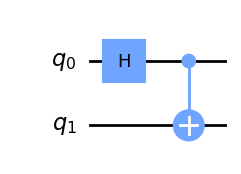

In [8]:
# Définition d'un circuit intriqué, pour retrouver les états de Bell
def circ_intr(c, q, p):
    c.h(q)
    c.cnot(q,p)
    return c
circ = QuantumCircuit(2)
c = circ_intr(circ, 0, 1)
c.draw('mpl')

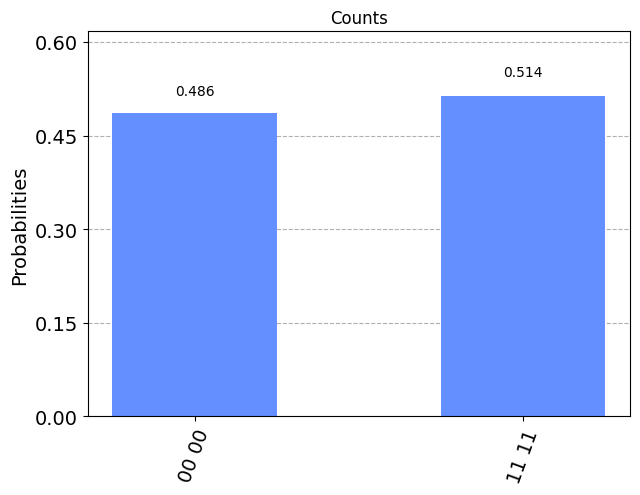

In [10]:
# Histogramme correspondant aux proportions de 00 et de 11 empiriques 
# à partir d'une simulation appliquée au premier état de Bell
Aer.backends()
c.measure_all()
simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(c, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(c)
plot_histogram(counts, title='Counts')

# Exercice 4

Découverte de la téléportation, implémentation du transfert d'état quantique.

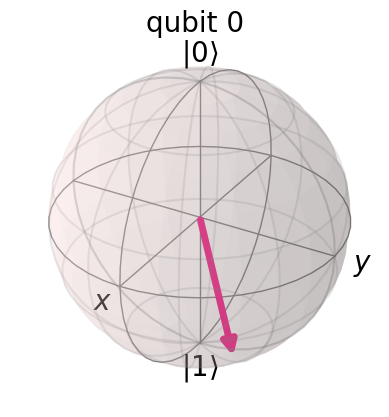

In [17]:
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
circ = QuantumCircuit(qr, crz, crx)
simulator = Aer.get_backend('aer_simulator')

# Affichage d'un vecteur quelconque sur la sphère de Bloch.
q = random_statevector(2)
plot_bloch_multivector(q)

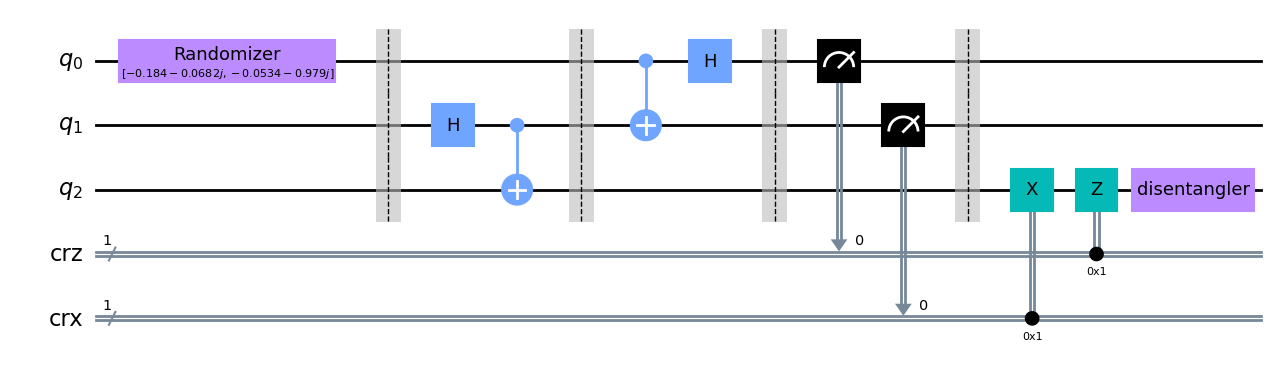

In [18]:
random_gate = Initialize(q)
random_gate.label = "Randomizer"
inverse_random_gate = random_gate.gates_to_uncompute()
circ.append(random_gate, [0])
circ.barrier()

# On intrique d'abord les qubits q1 et q2
circ.h(1)
circ.cx(1, 2)
circ.barrier()

# On dira qu'Alice possède le qubit q1, et Bob possède le qubit q2
circ.cx(0, 1)
circ.h(0)
circ.barrier()

# On effectue la mesure des qubits q0 et q1
circ.measure(0, 0)
circ.measure(1, 1)
circ.barrier()

# Bob applique les portes X et Z contrôlées par les bits crz et crx, à son qubit
circ.x(2).c_if(crx, 1)
circ.z(2).c_if(crz, 1)

circ.append(inverse_random_gate, [2])

circ.draw('mpl')

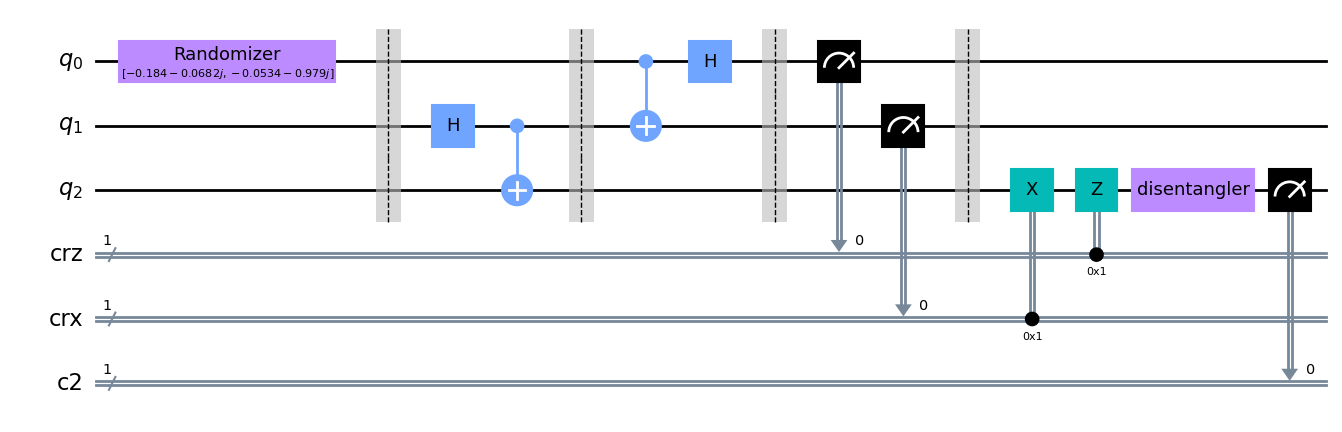

In [19]:
cr_result = ClassicalRegister(1)
circ.add_register(cr_result)
circ.measure(2, 2)
circ.draw('mpl')

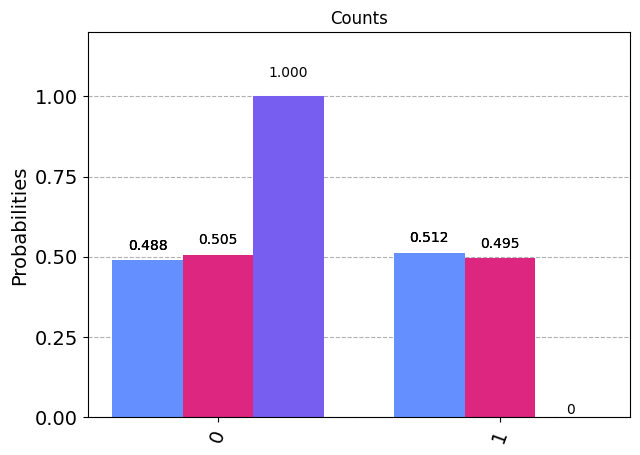

In [20]:
circ = transpile(circ, simulator)
result = simulator.run(circ).result()
counts = result.get_counts(circ)
qubit_counts = [marginal_counts(counts, [qubit]) for qubit in range(3)]
plot_histogram(qubit_counts, title='Counts')